In [2]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qiskit_aer.backends import AerSimulator
from qiskit_experiments.library import StateTomography

## Exercise 11

In [4]:
#implement the time evolution according to the second−order Trotterization
def evolve_symmetric(circ, g, dt):
    for i in range (circ.num_qubits):
        circ.rx(-1/2* dt *g , i )
    for i in range (int(circ.num_qubits/2)):
        circ.rzz(-dt , 2 * i , 2 * i+1)
    if int(circ.num_qubits)%2>0:
        for i in range (int(circ.num_qubits/2)):
            circ.rzz(-dt , 2 * i +1 ,2* i+2)
    else:
        for i in range(int(circ.num_qubits/2)-1):
            circ.rzz(-dt , 2 * i +1 ,2* i+2)
    for i in range(circ.num_qubits):
        circ.rx(-1/2* dt *g , i )
    return circ

#define the half−chain von Neumann entropy
def vN_entropy(rho):
    S = 0
    if rho.num_qubits % 2 == 1:
        print("odd number of qubits")
    else:
        rho_l = qiskit.quantum_info.partial_trace(rho, range(0, int(rho.num_qubits /2)))
        eig ,_ = np.linalg.eig(rho_l)

    #print(eig)
    for i in range(len(eig)):
        if eig[i] > 0:
            S += - eig[i] * np.log(eig[i])
        else:
            continue
    return S

#define the half−chain second Renyi entropy
def renyi2_entropy(rho):
    if rho.num_qubits % 2 == 1 :     
        print("odd number of qubits")
    else:
        rho_l = qiskit.quantum_info.partial_trace(rho, range(0, int(rho.num_qubits/2)))
        S = - np.log(rho_l.purity())
        return S

In [7]:
#define parameters
L=10
g=2
t=5 # was 5 before; with t=10 takes 5min to calculate
dt=0.01
t_array = np.linspace(0, t, 400)

#create arrays for results
SvN = []
Srenyi2 = []

#run over all times
for i in t_array:
    #prepare time−evolved state for every time step
    circ = qiskit.QuantumCircuit(L)
    for j in range(int(i/dt)):
        circ = evolve_symmetric(circ, g, dt)
    circ.save_density_matrix(label = 'rho')
    sim = AerSimulator()
    result = sim.run(circ).result()
    rho_entropy = result.data()['rho']

    #compute the von Neumann and second Renyi entropy for every time step
    SvN.append(vN_entropy(rho_entropy))
    Srenyi2.append(renyi2_entropy(rho_entropy))


In [ ]:
def func(x, a, b):

    return a * x + b

b = int(2/t *399)
popt, pcov = curve_fit(func, t_array[b:], SvN[b:])
popt2, pcov2 = curve_fit(func, t_array[b:], Srenyi2[b:])

c:\Users\Nutzer 1\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


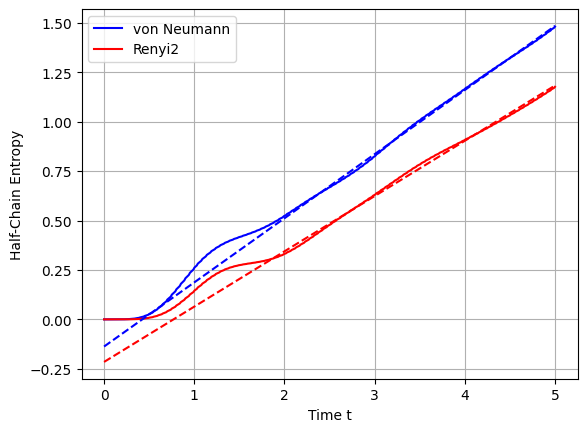

In [10]:
plt.plot(t_array, SvN, label='von Neumann', color='blue')
plt.plot(t_array, Srenyi2, label='Renyi2', color='red')
plt.plot(t_array, func(t_array, *popt), 'b--')
plt.plot(t_array, func(t_array, *popt2), 'r--')

plt.xlabel('Time t')
plt.ylabel('Half-Chain Entropy')
plt.legend()
plt.grid()
plt.savefig('Entropy')

# Exercise 12

In [5]:
# Set parameters
# Small system size as computational resources cannot resolve larger systems
L = 4
g = 2
tomo_rep = 400
t = 5
dt = 0.01
sim = AerSimulator()
t_array = np.linspace(0, t, 200)

# Create arrays for results
SvN_exp = []
Srenyi2_exp = []

# Run over all times
for i in t_array:
    # Prepare time-evolved state
    circ = qiskit.QuantumCircuit(L)
    for j in range(int(i / dt)):
        circ = evolve_symmetric(circ, g, dt)

    # Perform State Tomography experiment to determine state
    tomo = StateTomography(circ)
    tomo.set_run_options(shots=tomo_rep)
    tomo_data = tomo.run(sim).block_for_results()
    rho_tomo = tomo_data.analysis_results('state').value

    # Compute von Neumann and second Renyi entropy
    SvN_exp.append(vN_entropy(rho_tomo))
    Srenyi2_exp.append(renyi2_entropy(rho_tomo))


In [14]:
# Set parameters
# Small system size as computational resources cannot resolve larger systems
L = 4
g = 2
tomo_rep = 1000
t = 5
dt = 0.01
sim = AerSimulator()
t_array = np.linspace(0, t, 200)

# Create arrays for results
SvN_exp_1 = []
Srenyi2_exp_1 = []

# Run over all times
for i in t_array:
    # Prepare time-evolved state
    circ = qiskit.QuantumCircuit(L)
    for j in range(int(i / dt)):
        circ = evolve_symmetric(circ, g, dt)

    # Perform State Tomography experiment to determine state
    tomo = StateTomography(circ)
    tomo.set_run_options(shots=tomo_rep)
    tomo_data = tomo.run(sim).block_for_results()
    rho_tomo = tomo_data.analysis_results('state').value

    # Compute von Neumann and second Renyi entropy
    SvN_exp_1.append(vN_entropy(rho_tomo))
    Srenyi2_exp_1.append(renyi2_entropy(rho_tomo))


In [15]:
# Set parameters
# Small system size as computational resources cannot resolve larger systems
L = 4
g = 2
tomo_rep = 2000
t = 5
dt = 0.01
sim = AerSimulator()
t_array = np.linspace(0, t, 200)

# Create arrays for results
SvN_exp_2 = []
Srenyi2_exp_2 = []

# Run over all times
for i in t_array:
    # Prepare time-evolved state
    circ = qiskit.QuantumCircuit(L)
    for j in range(int(i / dt)):
        circ = evolve_symmetric(circ, g, dt)

    # Perform State Tomography experiment to determine state
    tomo = StateTomography(circ)
    tomo.set_run_options(shots=tomo_rep)
    tomo_data = tomo.run(sim).block_for_results()
    rho_tomo = tomo_data.analysis_results('state').value

    # Compute von Neumann and second Renyi entropy
    SvN_exp_2.append(vN_entropy(rho_tomo))
    Srenyi2_exp_2.append(renyi2_entropy(rho_tomo))


In [16]:
#define parameters
L=4
g=2
t=5 
dt=0.01
t_array = np.linspace(0, t, 200)

#create arrays for results
SvN_sim = []
Srenyi2_sim = []

#run over all times
for i in t_array:
    #prepare time−evolved state for every time step
    circ = qiskit.QuantumCircuit(L)
    for j in range(int(i/dt)):
        circ = evolve_symmetric(circ, g, dt)
    circ.save_density_matrix(label = 'rho')
    sim = AerSimulator()
    result = sim.run(circ).result()
    rho_entropy = result.data()['rho']

    #compute the von Neumann and second Renyi entropy for every time step
    SvN_sim.append(vN_entropy(rho_entropy))
    Srenyi2_sim.append(renyi2_entropy(rho_entropy))


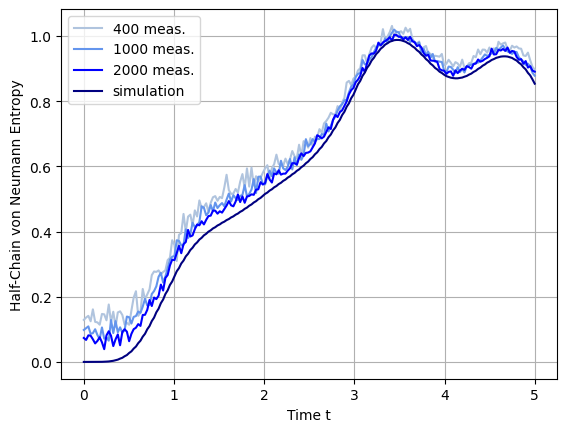

In [ ]:
plt.plot(t_array, SvN_exp, label='400 meas.', color='lightsteelblue')
plt.plot(t_array, SvN_exp_1, label='1000 meas.', color='cornflowerblue')
plt.plot(t_array, SvN_exp_2, label='2000 meas.', color='blue')
plt.plot(t_array, SvN_sim, label='simulation', color='navy')

plt.xlabel('Time t')
plt.ylabel('Half-Chain von Neumann Entropy')
plt.legend()
plt.grid()
plt.savefig('Entropy_vN')

c:\Users\Nutzer 1\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


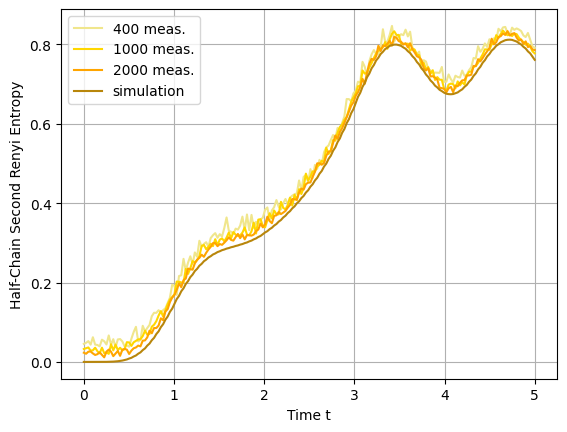

In [20]:
plt.plot(t_array, Srenyi2_exp, label='400 meas.', color='khaki')
plt.plot(t_array, Srenyi2_exp_1, label='1000 meas.', color='gold')
plt.plot(t_array, Srenyi2_exp_2, label='2000 meas.', color='orange')
plt.plot(t_array, Srenyi2_sim, label='simulation', color='darkgoldenrod')

plt.xlabel('Time t')
plt.ylabel('Half-Chain Second Renyi Entropy')
plt.legend()
plt.grid()
plt.savefig('Entropy_SR')